In [130]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  


# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    sol = np.zeros((Nz))  # Initialize solution array
    for i in range(1, Nz - 2):
        sol[i] = (f[i - 1] - 2 * f[i] + f[i + 1]) / (dz * dz)
    # Apply boundary conditions at i=0
    sol[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / (dz * dz)
    # Apply boundary conditions at i=Nz-1
    sol[Nz - 1] = (2 * f[Nz - 1] - 5 * f[Nz - 2] + 4 * f[Nz - 3] - f[Nz - 4]) / (dz * dz)
    return sol

def df(f,dz,Nz):
    sol = np.zeros((Nz))
    i=0
    sol[i]=((2*f[i])-(5*f[i+1])+(4*f[i+2])-f[i+3])/(dz*dz)
    i=Nz-1
    sol[i]=((2*f[i])-(5*f[i-1])+(4*f[i-2])-f[i-3])/(dz*dz)
    for i in range(1,Nz-2):
        sol[i]=(f[i-1]+(-2*f[i])+f[i+1])/(dz*dz)
    return sol

def solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D):
    #intials()
    Br=[]
    Bphi=[]
    decay=[]
    comp=[]

    if 0 in time_plot:
        Br.append(Br_t0)
        Bphi.append(Bphi_t0)

    
    for j in range(0, Nt + 1):
        
        k1r = dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz)
        k1phi = dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz)
        
        k2r = dBrdt(Br_t0+k1r*dt/2, Bphi_t0+k1phi*dt/2, z,D,alpha,dz,Nz)
        k2phi = (dBphidt(Br_t0+k1r*dt/2, Bphi_t0+k1phi*dt/2, z,D,alpha,dz,Nz)) 
        
        k3r = (dBrdt(Br_t0+k2r*dt/2,Bphi_t0+k2phi*dt/2,z,D,alpha,dz,Nz)) 
        k3phi = (dBphidt(Br_t0+k2r*dt/2,Bphi_t0+k2phi*dt/2,z,D,alpha,dz,Nz)) 
        
        k4r = (dBrdt(Br_t0+k3r*dt,Bphi_t0+k3phi*dt/2,z,D,alpha,dz,Nz)) 
        k4phi = (dBphidt(Br_t0+k3r*dt/2,Bphi_t0+k3phi*dt,z,D,alpha,dz,Nz))
        Br_t0 = Br_t0 + ((dt / 6.0) * (k1r +( 2 * k2r) + (2 * k3r) + k4r))
        
        Bphi_t0 = Bphi_t0 + ((dt / 6.0) * (k1phi + (2 * k2phi) + (2 * k3phi) + k4phi))
               
        # #(Anti Symmetric Ghost Zone)
        # Bphi_t0[1]=Bphi_z0
        # Br_t0[Nz-2]=Br_zf
        # Br_t0[1]=Br_z0
        # Bphi_t0[Nz-2]=Bphi_zf
        # Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        # Bphi_t0[Nz-1]=Bphi_z0-Bphi_t0[Nz-3]
        # Br_t0[0]=Br_z0-Br_t0[2]
        # Bphi_t0[0]=Bphi_z0-Bphi_t0[2]

        #  #(Anti Symmetric Ghost Zone)
        # Bphi_t0[1]=Tfn(z0,j*dt)
        # Br_t0[Nz-2]=Br_zf
        # Br_t0[1]=Br_z0
        # Bphi_t0[Nz-2]=Bphi_zf
        # Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        # Bphi_t0[Nz-1]=Tfn(z0,j*dt)-Bphi_t0[Nz-3]
        # Br_t0[0]=Br_z0-Br_t0[2]
        # Bphi_t0[0]=Tfn(z0,j*dt)-Bphi_t0[2]


         #(Anti Symmetric Ghost Zone)
        Bphi_t0[0]=Tfn(z0,j*dt)
        Br_t0[Nz-2]=Br_zf
        Br_t0[1]=Br_z0
        Bphi_t0[Nz-1]=20
        Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        
        Br_t0[0]=Br_z0-Br_t0[2]
        


        #decay.append(np.log10(np.sqrt((np.mean(Br_t0))**2+(np.mean(Bphi_t0))**2)))
        comp.append(Bphi_t0)

        if j in time_plot:
            Br.append(Br_t0)
            Bphi.append(Bphi_t0)
            #B_pitch.append(np.copy(B))

    pitch=np.arctan(np.array(Br)/np.array(Bphi))
    return Br,Bphi,pitch,decay,comp


def plotfn(Br, Bphi, pitch, decay,comp, time_plot,tt,z,Nz):
    # m, b = np.polyfit(tt, decay, 1)

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))  
    
    for i in range(len(time_plot)):
        ax[0, 0].plot(z[1:Nz-1], Br[i][1:Nz-1], label=f'tt={time_plot[i]}')
        ax[0, 1].plot(z[1:Nz-1], Bphi[i][1:Nz-1], label=f'tt={time_plot[i]}')
        ax[1, 1].plot(z[1:Nz-1], pitch[i][1:Nz-1], label=f'tt={time_plot[i]}')
    
    ax[0, 0].set_xlabel('z')
    ax[0, 0].set_ylabel('Br')
    ax[0, 0].set_title('Br vs z')
    ax[0, 0].legend()
    
    ax[0, 1].set_xlabel('z')
    ax[0, 1].set_ylabel(r'$B_{\phi}$')
    ax[0, 1].set_title(r'$B_{\phi}$ vs z')
    ax[0, 1].legend()

    # ax[1, 0].scatter(tt, decay)
    # ax[1, 0].plot(tt, m*tt+b,color='Red', label='linear fit')
    # ax[1, 0].set_xlabel('tt')
    # ax[1, 0].set_ylabel('log(B)')
    # ax[1, 0].set_title('exponential decay rate')
    
    #ax[1, 1].plot(z, pitch)
    ax[1, 1].set_xlabel('z')
    ax[1, 1].set_ylabel('pitch angle')
    ax[1, 1].set_title('pitch angle vs z')
    
    plt.tight_layout()
    plt.show()
    # print("The Decay rate is",np.round((m*np.log(10)),4))



# def D_c(solve2,precision):
#     D=0
#     h=2
#     while h>precision:  
#         drate=-1 #dummy value
#         print('current |D| =',D)
#         while drate<0:
#             Br,Bphi,pitch,decay=solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,-D)
#             m, c = np.polyfit(tt, decay , 1)
#             drate=m*np.log(10)
#             print('|D| =',D,' | decay rate =',drate)
#             D=D+h   
#         D=D-2*h
#         h=h/2
#     print("Critical dynamo number, |D_c| =",D+h/2)
#     #return D+h/2


In [131]:

# Equation for temperature distribution
#T(z,t)=T_surface+A*sin(2*np.pi*t/To)
A=5
T_surface=20
# To=24*3600
To=30
# z=10

# C_w=4174000
# C_s=2104000
C_s=1739
C_w=4180
rho_w=1000
rho_s=2650
lamb=2
qf=4*10**(-7)
rho=rho_s


a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20

In [132]:
# def Bphi_t0(z):
#     return 6*np.sin((np.pi)*z/2)+np.sin(np.pi*z*3)

def Bphi_t0(z):
    return Tfn(z,0)

def Br_t0(z):
    return 6*np.sin((np.pi)*z)


def alphafn(r):
    return (-1)
# def dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
#     return (d2f(Br_t0,dz,Nz)-df(alpha*alphafn(z)*Bphi_t0,dz,Nz))

def dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
    return ((d2f(Br_t0,dz,Nz)/100000000)-(2*df(Bphi_t0,dz,Nz)))


def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
    return ((-d2f(Bphi_t0,dz,Nz)/10000000)+(df(Bphi_t0,dz,Nz)/1000))


z0 = 0.0  # start of spatial region in z
zf = 1.5  # end of spatial domain in z
t0=0.0
tf = 50 
Nz = 10  # Number of spatial grid points
Nt = 20000  # Number of time steps
dz = (zf - z0) / (Nz - 1)  # Spatial step size
dt = tf / Nt  # Time step size



z = np.linspace(z0, zf, Nz)
tt = np.linspace(t0, tf, Nt+1)

Br_t0=Br_t0(z)
Bphi_t0=Bphi_t0(z)

Bphi_z0=20
Bphi_zf=20
Br_z0=0
Br_zf=0

#print(Bphi_z0,Bphi_zf,Br_z0,Br_zf)
time_plot=[int(Nt/5),int(Nt/2),int(Nt/1.5),int(Nt/1.2),int(Nt/1.1),Nt]

# time_plot=[0,10,100,10000,10500,11000,11500]

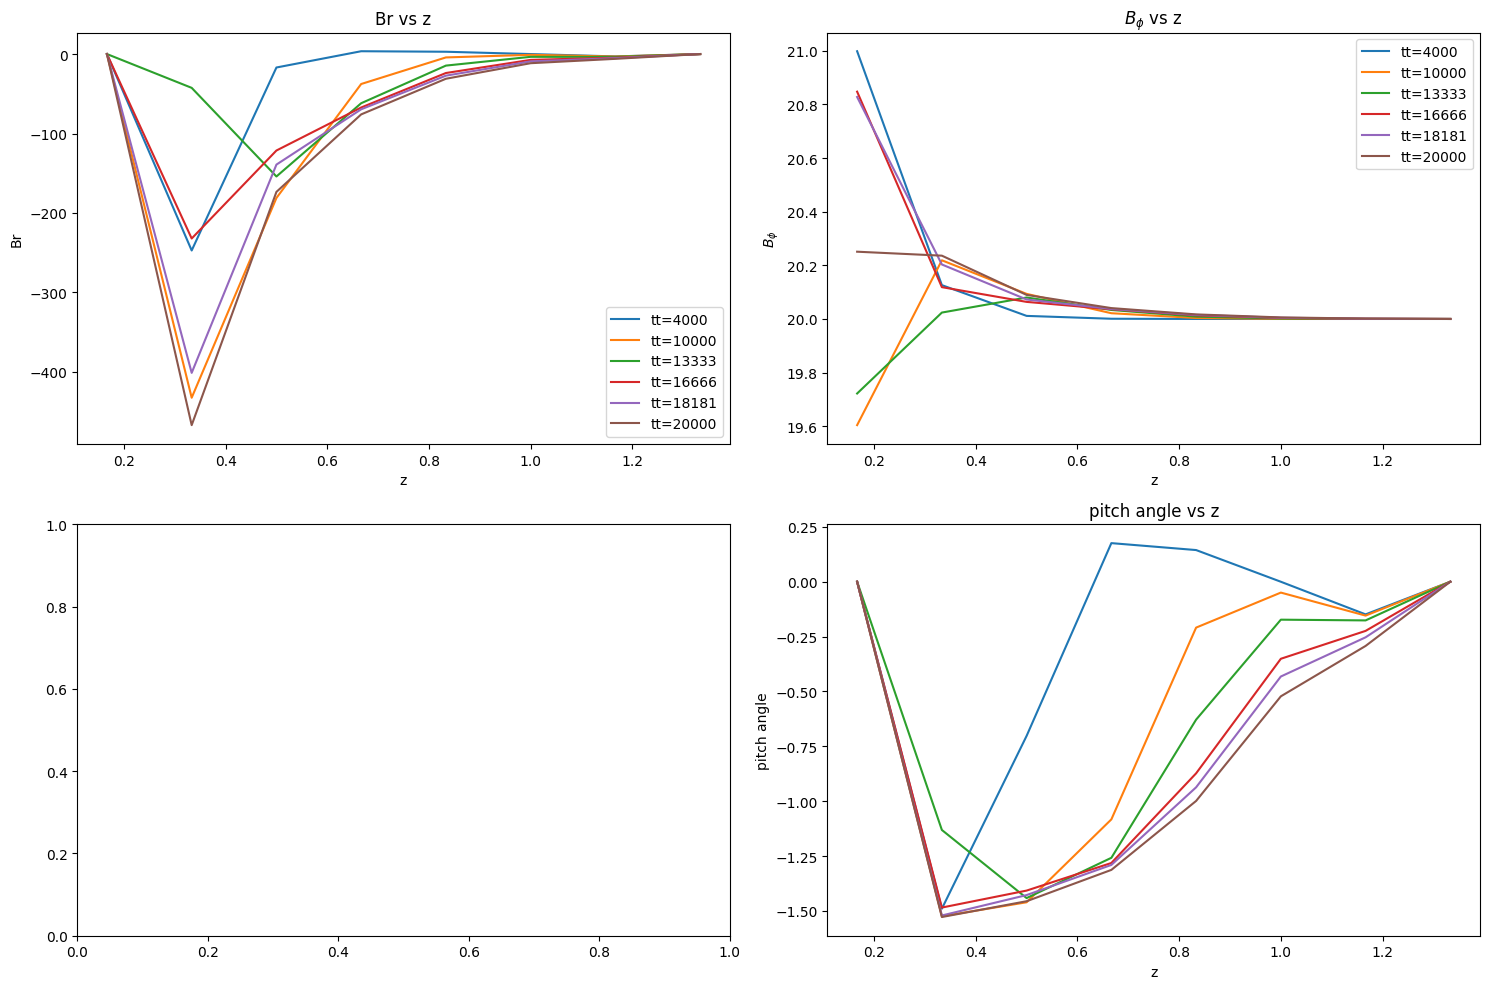

In [133]:
D, alpha = -1, 1
plotfn(*solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D),time_plot,tt,z,Nz)

In [134]:
Q,W,E,R,comp=solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D)
   

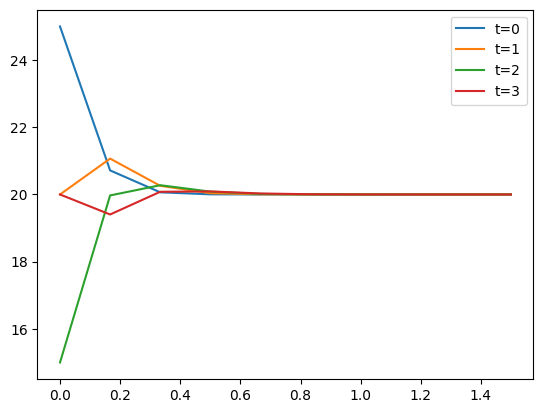

In [142]:
complot=[comp[3000],comp[6000],comp[9000],comp[12000]]
for i in range(len(complot)):
    plt.plot(z,complot[i],label=f't={i}')
plt.legend()
plt.show() 
